In [506]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

from difflib import get_close_matches

from IPython.display import display
from IPython.display import IFrame
import time
from random import randint
from random import choice

import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score

In [375]:
import config
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [427]:
df=pd.read_csv("main_dataframe.csv")

In [428]:
df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,main_artist,artist_id,song
0,0,0.777,0.700,1.0,-11.045,1.0,0.0869,0.23500,0.000008,0.8360,...,audio_features,6X4JeTWCuKEzKOEHXDtyBo,spotify:track:6X4JeTWCuKEzKOEHXDtyBo,https://api.spotify.com/v1/tracks/6X4JeTWCuKEz...,https://api.spotify.com/v1/audio-analysis/6X4J...,188613.0,4.0,Prince,5a2EaR3hamoenG9rDuVn8j,Little Red Corvette - Single Version
1,1,0.326,0.797,2.0,-2.359,1.0,0.0334,0.05220,0.000000,0.0810,...,audio_features,4AfsbRvvuN7nEHAhONdeEp,spotify:track:4AfsbRvvuN7nEHAhONdeEp,https://api.spotify.com/v1/tracks/4AfsbRvvuN7n...,https://api.spotify.com/v1/audio-analysis/4Afs...,288933.0,4.0,Bon Jovi,58lV9VcRSjABbAbfWS6skp,Never Say Goodbye
2,2,0.709,0.824,1.0,-8.824,1.0,0.0453,0.20700,0.000307,0.0888,...,audio_features,2tUBqZG2AbRi7Q0BIrVrEj,spotify:track:2tUBqZG2AbRi7Q0BIrVrEj,https://api.spotify.com/v1/tracks/2tUBqZG2AbRi...,https://api.spotify.com/v1/audio-analysis/2tUB...,291293.0,4.0,Whitney Houston,6XpaIBNiVzIetEPCWDvAFP,I Wanna Dance with Somebody (Who Loves Me)
3,3,0.768,0.716,2.0,-12.922,1.0,0.0625,0.06580,0.002130,0.0379,...,audio_features,6QG0wcgoCsa9pqFyTg0rRO,spotify:track:6QG0wcgoCsa9pqFyTg0rRO,https://api.spotify.com/v1/tracks/6QG0wcgoCsa9...,https://api.spotify.com/v1/audio-analysis/6QG0...,158107.0,4.0,DEVO,0UKfenbZb15sqhfPC6zbt3,Whip It
4,4,0.660,0.806,2.0,-8.010,1.0,0.0324,0.00332,0.000014,0.0986,...,audio_features,3pecdrUzTZjaqrw6iCLTvd,spotify:track:3pecdrUzTZjaqrw6iCLTvd,https://api.spotify.com/v1/tracks/3pecdrUzTZja...,https://api.spotify.com/v1/audio-analysis/3pec...,253253.0,4.0,Huey Lewis & The News,7A9yZMTrFZcgEWAX2kBfK6,Heart And Soul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,4644,0.780,0.700,10.0,-4.763,0.0,0.0845,0.01690,0.000000,0.1860,...,audio_features,5JVZ62EMS4kvo7nzvDL4nE,spotify:track:5JVZ62EMS4kvo7nzvDL4nE,https://api.spotify.com/v1/tracks/5JVZ62EMS4kv...,https://api.spotify.com/v1/audio-analysis/5JVZ...,169947.0,4.0,Nyck Caution,1ZyUXvaBXUsIZ3JD6jYGkt,"String Quintet No. 60 in C Major, Op. 30 No. 6..."
4645,4645,0.630,0.694,2.0,-6.593,1.0,0.3130,0.41900,0.000000,0.1340,...,audio_features,70hDklZStSazrExPjHJPfR,spotify:track:70hDklZStSazrExPjHJPfR,https://api.spotify.com/v1/tracks/70hDklZStSaz...,https://api.spotify.com/v1/audio-analysis/70hD...,222249.0,4.0,REASON,6XpXnnKHIhCOUbOLOJGe6o,Drømte mig en drøm (Arr. For String Quartet)
4646,4646,0.566,0.839,7.0,-2.637,1.0,0.3230,0.59900,0.000000,0.0855,...,audio_features,1LFDDwqjZtSzjXWIYXbY5O,spotify:track:1LFDDwqjZtSzjXWIYXbY5O,https://api.spotify.com/v1/tracks/1LFDDwqjZtSz...,https://api.spotify.com/v1/audio-analysis/1LFD...,181761.0,3.0,Logic,4xRYI6VqpkE3UwrDrAZL8L,Life
4647,4647,0.605,0.692,8.0,-7.450,1.0,0.4460,0.49500,0.000000,0.3030,...,audio_features,3drdWsJKiVCSQ2gKhd9BDT,spotify:track:3drdWsJKiVCSQ2gKhd9BDT,https://api.spotify.com/v1/tracks/3drdWsJKiVCS...,https://api.spotify.com/v1/audio-analysis/3drd...,224466.0,5.0,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,"Brahms: Violin Concerto in D Major, Op. 77: II..."


In [429]:
num_df=df.drop("Unnamed: 0",axis=1).select_dtypes(["number"])

In [430]:
num_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.777,0.700,1.0,-11.045,1.0,0.0869,0.23500,0.000008,0.8360,0.802,122.940,188613.0,4.0
1,0.326,0.797,2.0,-2.359,1.0,0.0334,0.05220,0.000000,0.0810,0.271,135.937,288933.0,4.0
2,0.709,0.824,1.0,-8.824,1.0,0.0453,0.20700,0.000307,0.0888,0.867,118.818,291293.0,4.0
3,0.768,0.716,2.0,-12.922,1.0,0.0625,0.06580,0.002130,0.0379,0.961,157.935,158107.0,4.0
4,0.660,0.806,2.0,-8.010,1.0,0.0324,0.00332,0.000014,0.0986,0.944,122.041,253253.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,0.780,0.700,10.0,-4.763,0.0,0.0845,0.01690,0.000000,0.1860,0.647,146.145,169947.0,4.0
4645,0.630,0.694,2.0,-6.593,1.0,0.3130,0.41900,0.000000,0.1340,0.440,91.749,222249.0,4.0
4646,0.566,0.839,7.0,-2.637,1.0,0.3230,0.59900,0.000000,0.0855,0.761,88.278,181761.0,3.0
4647,0.605,0.692,8.0,-7.450,1.0,0.4460,0.49500,0.000000,0.3030,0.685,124.840,224466.0,5.0


In [431]:
num_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4648.000000,4.648000e+03,4648.000000
mean,0.615693,0.678569,5.316050,-8.429738,0.590146,0.128353,0.210171,0.096230,0.197558,0.557798,115.350602,2.540700e+05,3.945138
std,0.200943,0.245665,3.627559,6.124804,0.491859,0.123019,0.292215,0.248987,0.161692,0.257141,28.001430,8.870270e+04,0.363793
min,0.059200,0.000099,0.000000,-51.878000,0.000000,0.022400,0.000003,0.000000,0.015700,0.000000,36.474000,1.989300e+04,1.000000
25%,0.508000,0.592000,2.000000,-9.380000,0.000000,0.039700,0.016600,0.000000,0.089075,0.379750,93.959500,2.079035e+05,4.000000
50%,0.652500,0.743000,6.000000,-6.493500,1.000000,0.061900,0.075900,0.000012,0.134000,0.595000,111.710000,2.385550e+05,4.000000
75%,0.763000,0.855000,9.000000,-4.832000,1.000000,0.205250,0.263000,0.004235,0.271000,0.761000,129.986750,2.806090e+05,4.000000
max,0.988000,0.997000,11.000000,0.496000,1.000000,0.856000,0.996000,0.985000,0.986000,0.984000,210.857000,2.328067e+06,5.000000


### Before we scale we have to drop some of the irrelevant columns - Who decide whats relevant? This guy

In [432]:
num_df=num_df.drop(["mode","liveness","acousticness","valence","duration_ms","time_signature"],axis=1)
num_df

,danceability,energy,key,loudness,speechiness,instrumentalness,tempo
0,0.777,0.700,1.0,-11.045,0.0869,0.000008,122.940
1,0.326,0.797,2.0,-2.359,0.0334,0.000000,135.937
2,0.709,0.824,1.0,-8.824,0.0453,0.000307,118.818
3,0.768,0.716,2.0,-12.922,0.0625,0.002130,157.935
4,0.660,0.806,2.0,-8.010,0.0324,0.000014,122.041
...,...,...,...,...,...,...,...
4644,0.780,0.700,10.0,-4.763,0.0845,0.000000,146.145
4645,0.630,0.694,2.0,-6.593,0.3130,0.000000,91.749
4646,0.566,0.839,7.0,-2.637,0.3230,0.000000,88.278
4647,0.605,0.692,8.0,-7.450,0.4460,0.000000,124.840


## Scaling the data. Saving scaler in pickle later

In [433]:
scaler = StandardScaler()

num_scaled = scaler.fit_transform(num_df)

num_df_scaled = pd.DataFrame(num_scaled, columns = num_df.columns)

In [434]:
num_df_scaled

,danceability,energy,key,loudness,speechiness,instrumentalness,tempo
0,0.802840,0.087246,-1.189923,-0.427041,-0.337002,-0.386497,0.271065
1,-1.441823,0.482135,-0.914225,0.991279,-0.771941,-0.386529,0.735270
2,0.464399,0.592053,-1.189923,-0.064378,-0.675197,-0.385296,0.123843
3,0.758046,0.152382,-0.914225,-0.733533,-0.535367,-0.377973,1.520957
4,0.220522,0.518774,-0.914225,0.068538,-0.780070,-0.386473,0.238956
...,...,...,...,...,...,...,...
4644,0.817771,0.087246,1.291352,0.598735,-0.356514,-0.386529,1.099862
4645,0.071209,0.062820,-0.914225,0.299917,1.501119,-0.386529,-0.842962
4646,-0.247324,0.653118,0.464260,0.945885,1.582416,-0.386529,-0.966933
4647,-0.053218,0.054678,0.739957,0.159980,2.582367,-0.386529,0.338926


In [438]:
num_df_scaled.dropna(inplace=True)

In [439]:
num_df_scaled

,danceability,energy,key,loudness,speechiness,instrumentalness,tempo
0,0.802840,0.087246,-1.189923,-0.427041,-0.337002,-0.386497,0.271065
1,-1.441823,0.482135,-0.914225,0.991279,-0.771941,-0.386529,0.735270
2,0.464399,0.592053,-1.189923,-0.064378,-0.675197,-0.385296,0.123843
3,0.758046,0.152382,-0.914225,-0.733533,-0.535367,-0.377973,1.520957
4,0.220522,0.518774,-0.914225,0.068538,-0.780070,-0.386473,0.238956
...,...,...,...,...,...,...,...
4644,0.817771,0.087246,1.291352,0.598735,-0.356514,-0.386529,1.099862
4645,0.071209,0.062820,-0.914225,0.299917,1.501119,-0.386529,-0.842962
4646,-0.247324,0.653118,0.464260,0.945885,1.582416,-0.386529,-0.966933
4647,-0.053218,0.054678,0.739957,0.159980,2.582367,-0.386529,0.338926


# Now to the cluster thingiess

In [440]:
kmeans = KMeans(n_clusters=60, random_state=1234)
kmeans.fit(num_df_scaled)

KMeans(n_clusters=60, random_state=1234)

In [441]:
kmeans.labels_

array([22, 23, 22, ..., 37, 40,  5], dtype=int32)

In [442]:
#Does the same as above code lol
#labels = kmeans.predict(num_df_scaled.drop("cluster",axis=1).select_dtypes("number"))
labels = kmeans.predict(num_df_scaled.select_dtypes("number"))

In [443]:
labels

array([22, 23, 22, ..., 37, 40,  5], dtype=int32)

In [444]:
clusters = np.unique(labels)
list(clusters)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

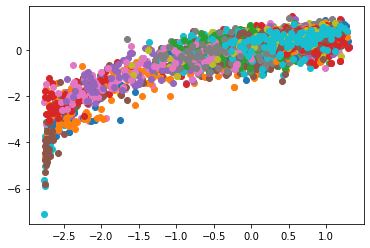

In [445]:
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(num_df_scaled.to_numpy()[row_ix, 1], num_df_scaled.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

In [446]:
pd.Series(labels).value_counts().sort_index()

0      96
1      49
2      68
3     105
4      67
5      84
6      54
7     114
8      69
9      39
10     64
11     75
12     25
13    108
14     97
15     65
16     38
17     85
18    111
19     20
20     58
21     42
22    128
23     58
24     28
25     34
26    116
27    113
28     96
29     92
30     59
31     54
32    100
33    162
34     66
35     30
36     53
37     88
38    127
39     99
40     26
41     79
42     19
43     79
44    146
45    116
46     45
47     72
48     27
49    102
50     61
51    135
52     99
53    194
54     36
55    114
56     49
57     53
58     48
59    112
dtype: int64

In [447]:
kmeans.inertia_

4362.028864994026

In [311]:
#num_df_scaled["cluster"] = labels
#num_df_scaled

### Above was with 6 clusters, but let's figure out the optimal number of clusters.

In [312]:
#num_df_scaled=num_df_scaled.drop("cluster",axis=1)

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

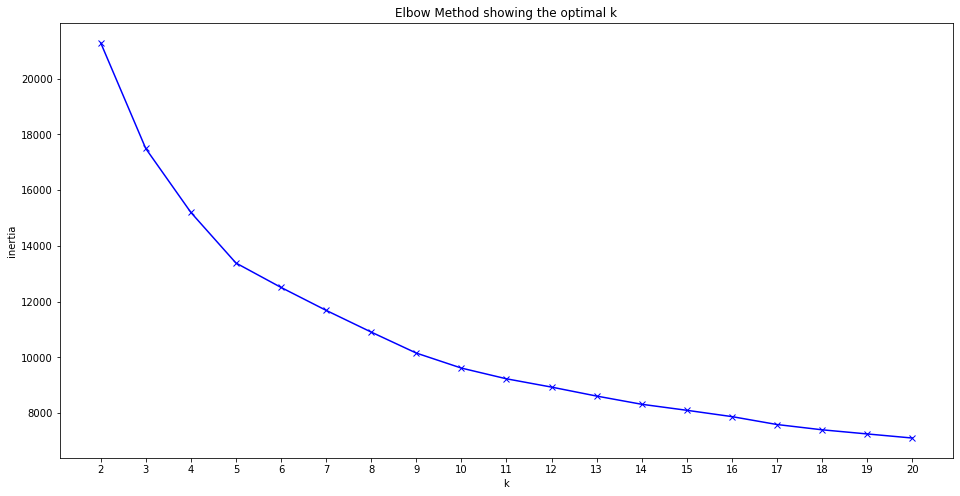

In [448]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans3 = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans3.fit(num_df_scaled)
    inertia.append(kmeans3.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

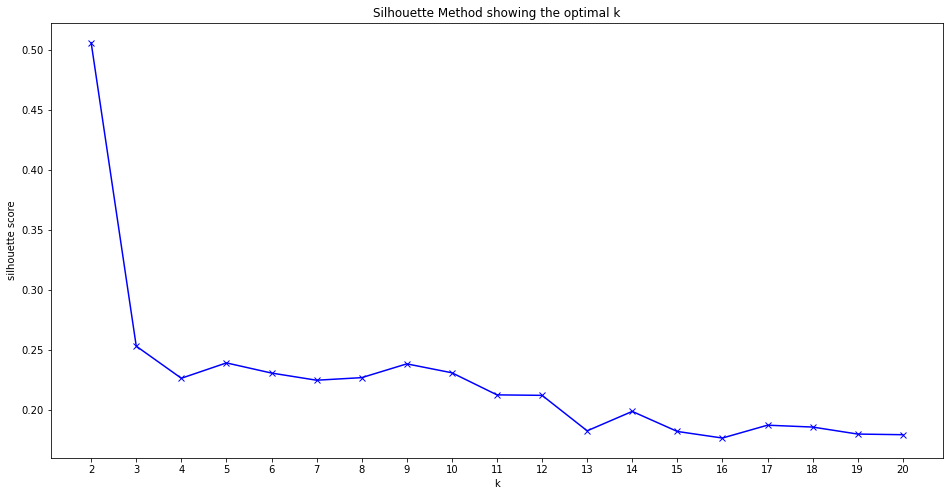

In [449]:
#Same with another function, silhouette
silhouette = []

for k in K:
    kmeans4 = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans4.fit(num_df_scaled)
    
    filename = "Model/kmeans4_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans4,f)
    
    silhouette.append(silhouette_score(num_df_scaled, kmeans4.predict(num_df_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

I will here choose 4

In [450]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(num_df_scaled)
print(kmeans2.inertia_)

11391.844074306247


In [451]:
labels2 = kmeans2.predict(num_df_scaled)
labels2

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

Adding labels2 to mu dataframe

In [317]:
#num_df_scaled["cluster"]=labels2

In [452]:
clusters2 = np.unique(labels2)
list(clusters2)

[0, 1, 2, 3, 4, 5, 6, 7]

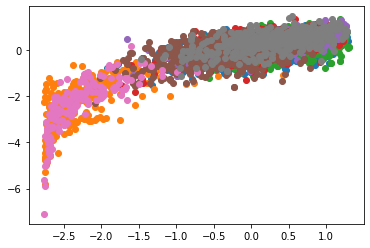

In [453]:
for cluster in clusters2:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels2 == cluster)
    # create scatter of these samples
    plt.scatter(num_df_scaled.to_numpy()[row_ix, 1], num_df_scaled.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

In [320]:
with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)



In [321]:
with open("Model/kmeans_cheese.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [322]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

## Before making into csv we need to add the song id back

In [454]:
df_scaled=num_df_scaled

df_scaled["song_id"]=df["id"]
df_scaled["artist"]=df["main_artist"]
df_scaled["song"]=df["song"]

In [455]:
df_scaled

,danceability,energy,key,loudness,speechiness,instrumentalness,tempo,song_id,artist,song
0,0.802840,0.087246,-1.189923,-0.427041,-0.337002,-0.386497,0.271065,6X4JeTWCuKEzKOEHXDtyBo,Prince,Little Red Corvette - Single Version
1,-1.441823,0.482135,-0.914225,0.991279,-0.771941,-0.386529,0.735270,4AfsbRvvuN7nEHAhONdeEp,Bon Jovi,Never Say Goodbye
2,0.464399,0.592053,-1.189923,-0.064378,-0.675197,-0.385296,0.123843,2tUBqZG2AbRi7Q0BIrVrEj,Whitney Houston,I Wanna Dance with Somebody (Who Loves Me)
3,0.758046,0.152382,-0.914225,-0.733533,-0.535367,-0.377973,1.520957,6QG0wcgoCsa9pqFyTg0rRO,DEVO,Whip It
4,0.220522,0.518774,-0.914225,0.068538,-0.780070,-0.386473,0.238956,3pecdrUzTZjaqrw6iCLTvd,Huey Lewis & The News,Heart And Soul
...,...,...,...,...,...,...,...,...,...,...
4644,0.817771,0.087246,1.291352,0.598735,-0.356514,-0.386529,1.099862,5JVZ62EMS4kvo7nzvDL4nE,Nyck Caution,"String Quintet No. 60 in C Major, Op. 30 No. 6..."
4645,0.071209,0.062820,-0.914225,0.299917,1.501119,-0.386529,-0.842962,70hDklZStSazrExPjHJPfR,REASON,Drømte mig en drøm (Arr. For String Quartet)
4646,-0.247324,0.653118,0.464260,0.945885,1.582416,-0.386529,-0.966933,1LFDDwqjZtSzjXWIYXbY5O,Logic,Life
4647,-0.053218,0.054678,0.739957,0.159980,2.582367,-0.386529,0.338926,3drdWsJKiVCSQ2gKhd9BDT,Kendrick Lamar,"Brahms: Violin Concerto in D Major, Op. 77: II..."


In [470]:
labels

array([22, 23, 22, ..., 37, 40,  5], dtype=int32)

In [472]:
df_scaled["cluster"]=labels

In [466]:
#features=["danceability","energy","key","loudness","speechiness","instrumentalness","tempo"]

#ches=pd.DataFrame(sp.audio_features("1Y25uib0Cu5kYTtNuRqyRU")[0],columns=features,index=[0])
#ches


In [467]:
#ches=scaler.transform(ches)
#ches

In [468]:
#prediction("1Y25uib0Cu5kYTtNuRqyRU")

In [469]:
#int(kmeans.predict(ches))



In [373]:
num_df_scaled

,danceability,energy,key,loudness,speechiness,instrumentalness,tempo,song_id,artist,song
0,1.001981,-0.053343,-1.150817,-0.825464,0.480390,-0.279721,0.071635,6X4JeTWCuKEzKOEHXDtyBo,Prince,Little Red Corvette - Single Version
1,-2.002908,0.488310,-0.871999,1.869342,-0.438540,-0.279778,0.570450,4AfsbRvvuN7nEHAhONdeEp,Bon Jovi,Never Say Goodbye
2,0.548916,0.639080,-1.150817,-0.136406,-0.234142,-0.277564,-0.086565,2tUBqZG2AbRi7Q0BIrVrEj,Whitney Houston,I Wanna Dance with Somebody (Who Loves Me)
3,0.942016,0.036002,-0.871999,-1.407798,0.061289,-0.264418,1.414717,6QG0wcgoCsa9pqFyTg0rRO,DEVO,Whip It
4,0.222442,0.538567,-0.871999,0.116136,-0.455716,-0.279678,0.037132,3pecdrUzTZjaqrw6iCLTvd,Huey Lewis & The News,Heart And Soul
...,...,...,...,...,...,...,...,...,...,...
1101,-1.023487,-0.204113,-1.429635,-1.780095,-0.388729,-0.279778,0.656688,0FoB9BAV7B2Kv6NxOFZtSO,Night Ranger,When You Close Your Eyes
1102,1.081934,0.912698,0.522090,-0.993618,-0.438540,-0.229152,0.440037,4B5uj8TKUnFNrRDUls8uqT,Depeche Mode,Route 66 - Beatmasters Mix
1103,0.722147,0.080674,0.243272,-0.365678,-0.122497,-0.279561,-0.960537,1SXSLvVq87U2DctZDXU5Id,Peter Gabriel,Games Without Frontiers
1104,1.441721,1.392927,0.243272,1.070766,0.557683,-0.279778,0.572407,2QLEN3RVunMas7j0PHjeAT,Quad City DJ's,C'mon N' Ride It (The Train)


# Okay instead of opening a new doc, we make the recommendation here

In [457]:
top100=pd.read_csv("top100now")
top100=top100.drop("Unnamed: 0",axis=1)
top100

,song,artist
0,Anti-Hero,Taylor Swift
1,Rich Flex,Drake & 21 Savage
2,Unholy,Sam Smith & Kim Petras
3,Bad Habit,Steve Lacy
4,As It Was,Harry Styles
...,...,...
95,The Great War,Taylor Swift
96,Gotta Move On,Diddy & Bryson Tiller
97,Forget Me,Lewis Capaldi
98,"Going, Going, Gone",Luke Combs


Here we make a function to search songs and making the user choose the specific one they mean.

In [458]:
def choose_song(results):
    l=[]
    for i in results["tracks"]["items"]:
        l.append(i["id"])
    for i,b in enumerate(results["tracks"]["items"]):
        print(str(i)+" "+b["name"]+" by " +b["artists"][0]["name"])
    try:
        number=int(input("type the corresponding number to the song you are searching for: "))
        return l[number]
    except:
        print("You typed an invalid number, try again goofy")
        exit=input("press q to exit: ")
        if exit.lower()=="q":
            return None
        else:
            return choose_song(results)
    

In [459]:
def prediction(s_id):
    features=["danceability","energy","key","loudness","speechiness","instrumentalness","tempo"]
    df=pd.DataFrame(sp.audio_features(s_id)[0],columns=features,index=[0])
    
    df=scaler.transform(df)
    clust=kmeans.predict(df)
    return int(clust)

#### Here comes two functions exclusively to the hot 100 songs - a mis-spelling autocorrect function and one to choose the song they mean if there are two with the same name.

In [460]:
def str_similar(string,df):
    match=get_close_matches(string,list(df["song"].unique()),1)
    if len(match)==1:
        return match[0]
    else:
        return False

In [461]:
def which_artist(name,df):
    li=list(df[df["song"]==name]["artist"])
    for art in li:
        ans=input(f"Do you mean {name} by {art}? write y for yes, press any other key for no: ")
        if ans.lower() =="y":
            return art
            break
        else:
            if art==li[-1]:
                print("Sorry, we didn't find the song you were looking for.")
                break
            else:
                continue

In [462]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [510]:
def recommendation():
    song_req=input("Type a song you like: ")
    song_id=choose_song(sp.search(q=song_req,limit=3,market="GB"))
    
    if str_similar(song_req,top100)!=False:
        song_req=str_similar(song_req,top100).lower()
        if top100["song"].apply(lambda x: x.lower()).value_counts()[song_req]>1:
            print("We found more than one song matching this name")
            which_artist(song_req)
            #### More code needed here, we only know artist and song - give recommendation
        else:
            new_rec=choice(list(top100.drop(top100.index[top100['song'].apply(lambda x: x.lower())==song_req.lower()].to_list()[0],axis=0)["song"]))
            arti=top100.loc[top100.index[top100['song'].apply(lambda x: x.lower())==new_rec.lower()].to_list()[0],'artist']
            print(f"You might also like '{new_rec}' by {arti}")
            rec_id=sp.search(q="track:"+new_rec,type="track",limit=3,market="GB")["tracks"]["items"][0]["id"]
            return play_song(rec_id)
    else:
        cluster=prediction(song_id)
        temp_df=df_scaled.loc[df_scaled["cluster"] == cluster]
        listy=list(temp_df["song_id"])
        rec=choice(listy)
        display(play_song(song_id))
        display(play_song(rec))
            

In [511]:
recommendation()

Type a song you like: wihout me
0 Without Me by Eminem
1 The reasons u love me by Hisoks
2 Without Me by Halsey
type the corresponding number to the song you are searching for: 0


/Users/Clement/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
